In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [8]:
sns.set(style="whitegrid")

In [9]:
df = pd.read_excel("/content/ER Wait Time Dataset.xlsx")
df.columns = df.columns.str.strip()
df['Visit Date'] = pd.to_datetime(df['Visit Date'])

In [11]:
df['Hour'] = df['Visit Date'].dt.hour
df['Month'] = df['Visit Date'].dt.to_period('M').astype(str)
df['Registration to Triage'] = df['Time to Triage (min)'] - df['Time to Registration (min)']
df['Triage to Medical'] = df['Time to Medical Professional (min)'] - df['Time to Triage (min)']
df['Registration to Triage'] = df['Registration to Triage'].clip(lower=0)
df['Triage to Medical'] = df['Triage to Medical'].clip(lower=0)

In [12]:
# Create appointment load if missing
if 'Appointment Load' not in df.columns:
    np.random.seed(42)
    df['Appointment Load'] = np.random.randint(50, 200, size=len(df))

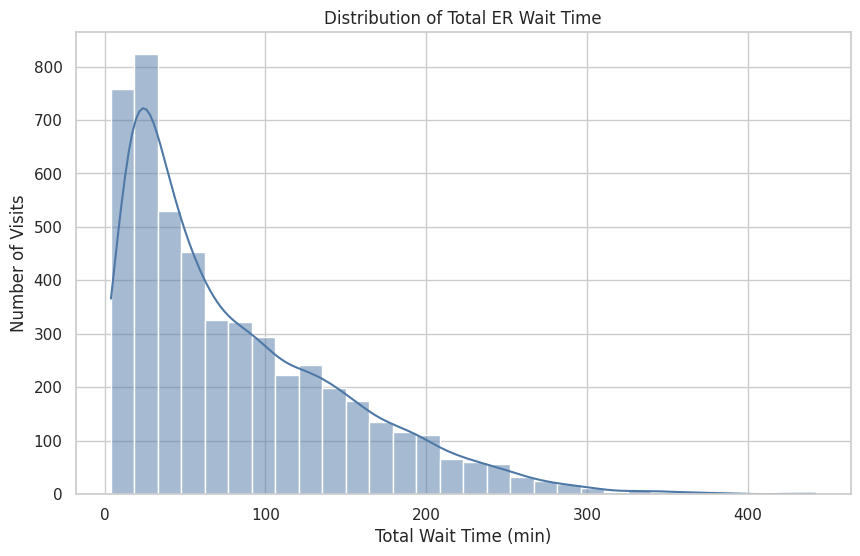

In [13]:
# Distribution of Total Wait Time
plt.figure(figsize=(10,6))
sns.histplot(df['Total Wait Time (min)'], bins=30, kde=True, color="#4E79A7")
plt.title("Distribution of Total ER Wait Time")
plt.xlabel("Total Wait Time (min)")
plt.ylabel("Number of Visits")
plt.show()

/tmp/ipython-input-14-32119941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total Wait Time (min)', data=df, palette="Set2")


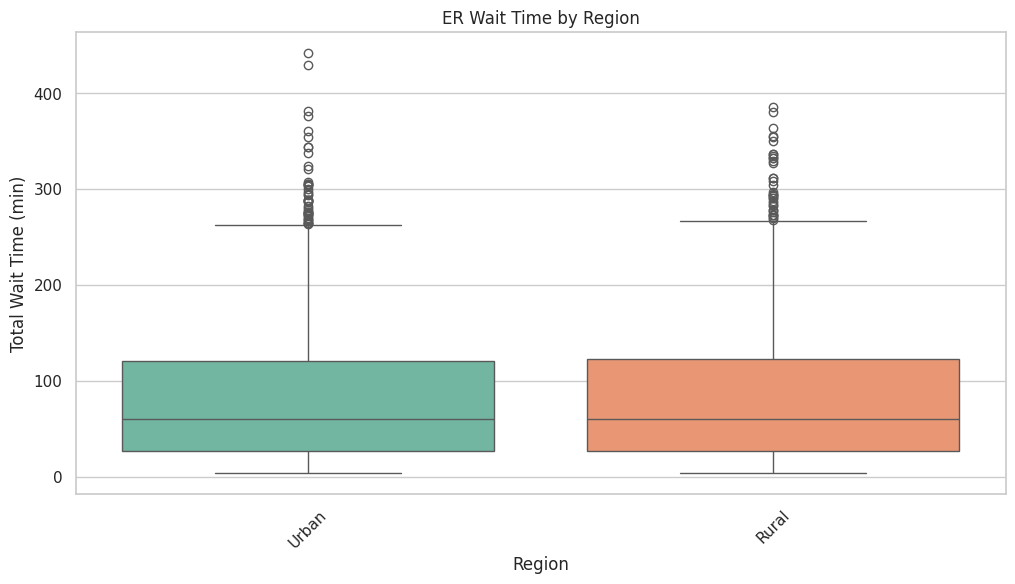

In [14]:
# Wait Time by Region
plt.figure(figsize=(12,6))
sns.boxplot(x='Region', y='Total Wait Time (min)', data=df, palette="Set2")
plt.title("ER Wait Time by Region")
plt.xlabel("Region")
plt.ylabel("Total Wait Time (min)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-15-3296173184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Total Wait Time (min)', data=df,


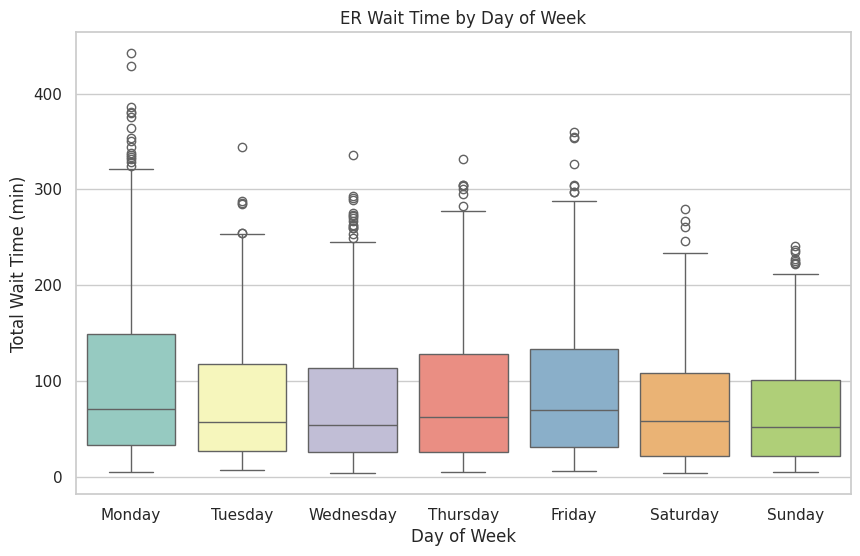

In [15]:
# Wait Time by Day of Week
plt.figure(figsize=(10,6))
sns.boxplot(x='Day of Week', y='Total Wait Time (min)', data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette="Set3")
plt.title("ER Wait Time by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Wait Time (min)")
plt.show()

/tmp/ipython-input-16-222627236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Urgency Level', y='Total Wait Time (min)', data=df, palette="Pastel1")


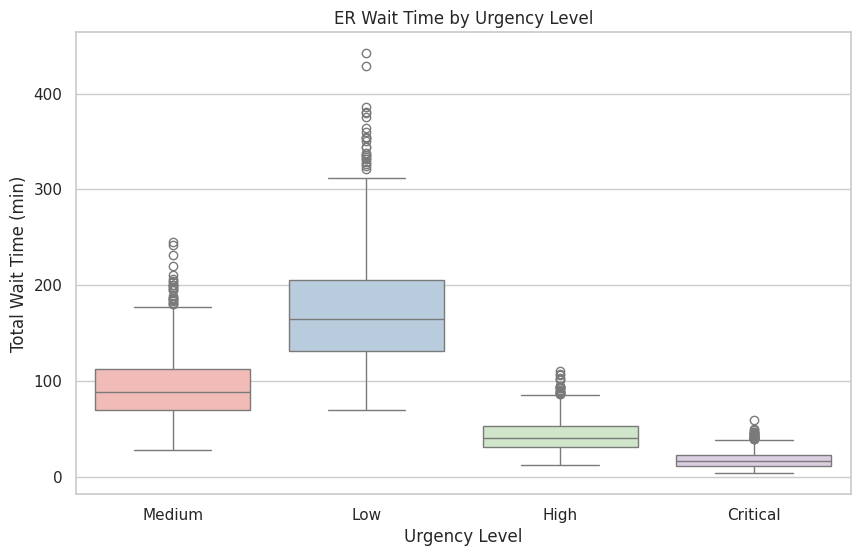

In [16]:
# Wait Time by Urgency Level
plt.figure(figsize=(10,6))
sns.boxplot(x='Urgency Level', y='Total Wait Time (min)', data=df, palette="Pastel1")
plt.title("ER Wait Time by Urgency Level")
plt.xlabel("Urgency Level")
plt.ylabel("Total Wait Time (min)")
plt.show()

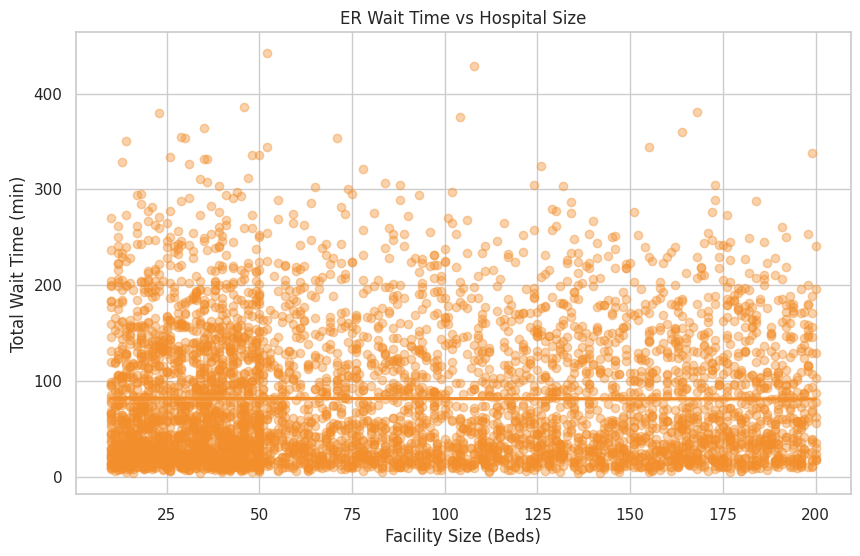

In [17]:
# Wait Time vs Hospital Size
plt.figure(figsize=(10,6))
sns.regplot(x='Facility Size (Beds)', y='Total Wait Time (min)', data=df, scatter_kws={'alpha':0.4}, color="#F28E2B")
plt.title("ER Wait Time vs Hospital Size")
plt.xlabel("Facility Size (Beds)")
plt.ylabel("Total Wait Time (min)")
plt.show()

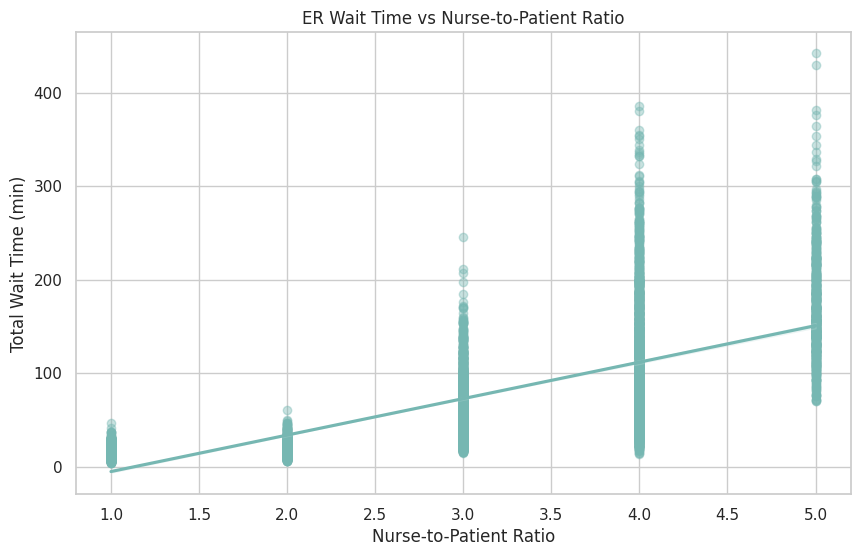

In [18]:
# Wait Time vs Nurse-to-Patient Ratio
plt.figure(figsize=(10,6))
sns.regplot(x='Nurse-to-Patient Ratio', y='Total Wait Time (min)', data=df, scatter_kws={'alpha':0.4}, color="#76B7B2")
plt.title("ER Wait Time vs Nurse-to-Patient Ratio")
plt.xlabel("Nurse-to-Patient Ratio")
plt.ylabel("Total Wait Time (min)")
plt.show()


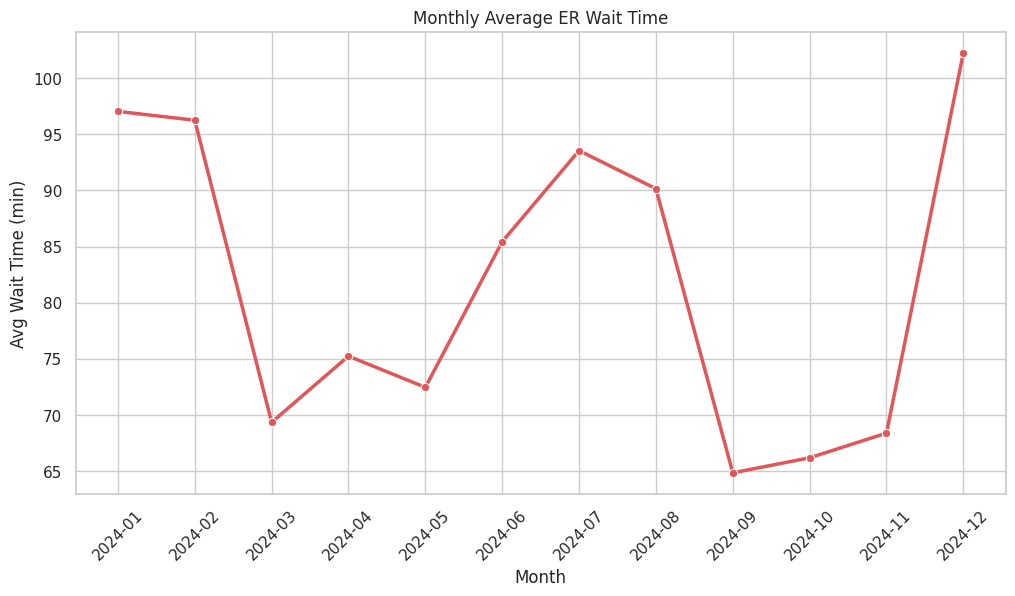

In [19]:
monthly_trend = df.groupby('Month')['Total Wait Time (min)'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total Wait Time (min)', data=monthly_trend, marker='o', color="#E15759", linewidth=2.5)
plt.xticks(rotation=45)
plt.title("Monthly Average ER Wait Time")
plt.ylabel("Avg Wait Time (min)")
plt.show()

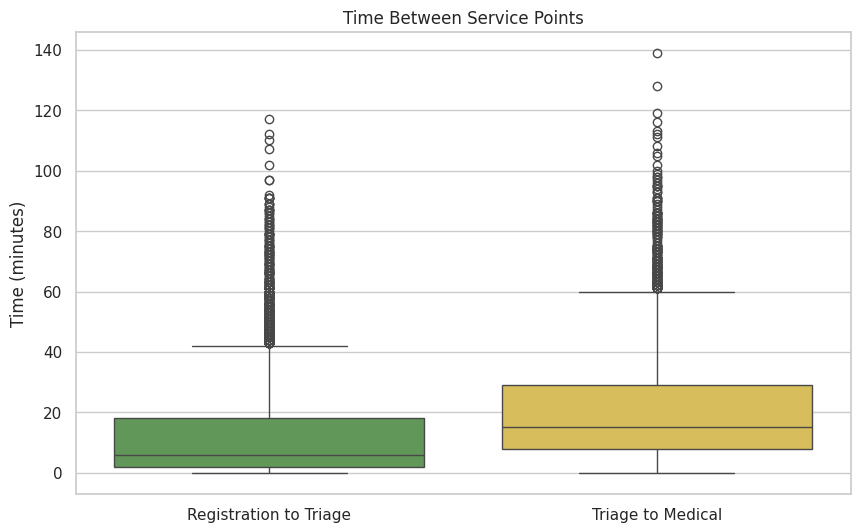

In [20]:
# Service Point Durations
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Registration to Triage', 'Triage to Medical']], palette=["#59A14F", "#EDC948"])
plt.title("Time Between Service Points")
plt.ylabel("Time (minutes)")
plt.show()


In [21]:
# 5. Predictive Modeling
df_model = df.copy()
df_model = pd.get_dummies(df_model, columns=['Urgency Level', 'Region', 'Day of Week'], drop_first=True)

features = [
    'Facility Size (Beds)',
    'Nurse-to-Patient Ratio',
    'Specialist Availability',
    'Appointment Load'
] + [col for col in df_model.columns if col.startswith('Urgency Level_')
     or col.startswith('Region_') or col.startswith('Day of Week_')]

X = df_model[features]
y = df_model['Total Wait Time (min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model MAE: {mae:.2f} minutes")

Model MAE: 21.80 minutes


In [22]:
# 🔮 6. Add Predictions and Export
# ===============================================
df['Predicted Wait Time (min)'] = model.predict(X)
df.to_csv("er_wait_time_processed.csv", index=False)
print("Exported to er_wait_time_processed.csv")

Exported to er_wait_time_processed.csv
